In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv(r'D:\Datasets\lithium-ion batteries.csv')

In [58]:
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [60]:
df.isna().sum()

Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64

<AxesSubplot:>

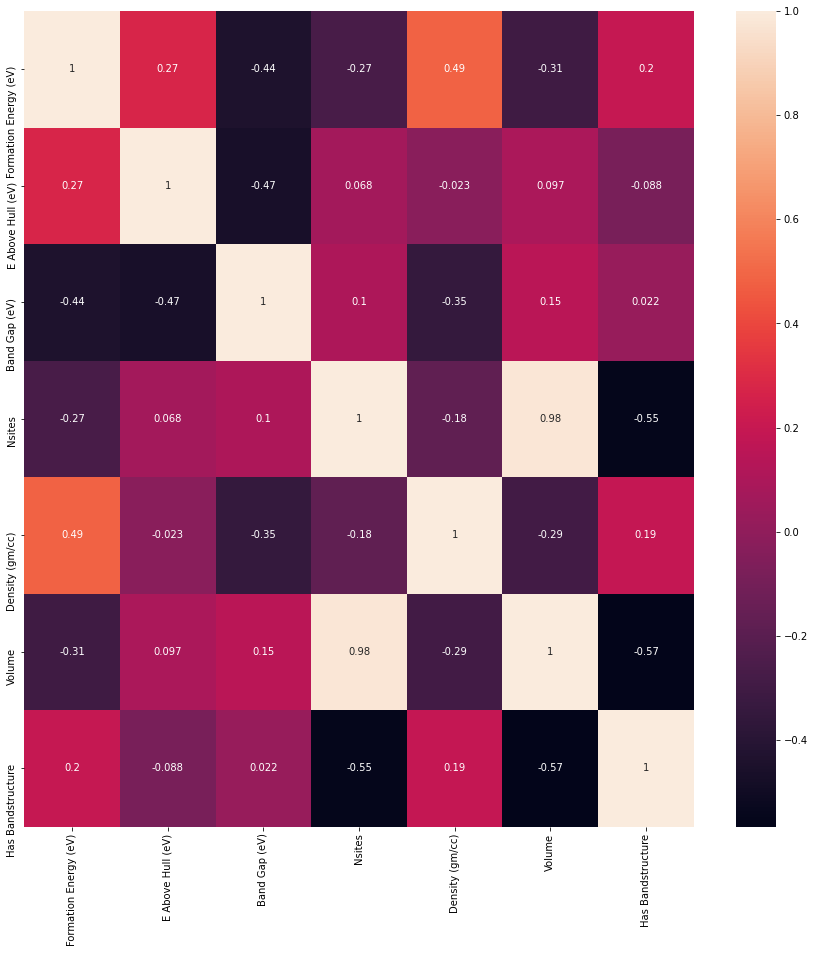

In [61]:
#correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [62]:
df2=df.copy().drop(columns=['Materials Id','Formula','Spacegroup','Crystal System','Has Bandstructure'])

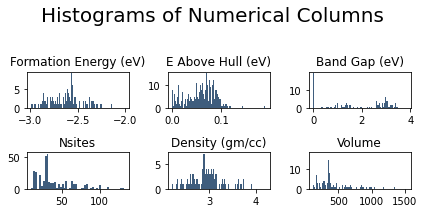

In [63]:
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, df2.shape[1] + 1):
    plt.subplot(3, 3, i)
    f = plt.gca()
    f.set_title(df2.columns.values[i - 1])

    vals = np.size(df2.iloc[:, i - 1].unique())
    
    plt.hist(df2.iloc[:, i - 1], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

In [64]:
y=df['Crystal System']


In [65]:
#one hot encoding of feature variable
y=pd.get_dummies(y)


In [66]:
y.columns

Index(['monoclinic', 'orthorhombic', 'triclinic'], dtype='object')

In [67]:
y.value_counts()

monoclinic  orthorhombic  triclinic
1           0             0            139
0           1             0            128
            0             1             72
dtype: int64

In [68]:
x=df.copy().drop(columns=['Materials Id','Formula','Spacegroup','Crystal System','Has Bandstructure'])

In [69]:
x.shape

(339, 6)

In [70]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(x))

X_train2.columns = x.columns.values

X_train2.index = x.index.values

x = X_train2


In [71]:
#deep learning model
import keras

from keras.models import Sequential
from keras.layers import Dense

In [72]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(6,)))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(3,activation="softmax"))

In [73]:

model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [74]:
model.fit(x,y,epochs=100)

Epoch 1/100
11/11 [==============================] - 1s 3ms/step - loss: 1.0858 - accuracy: 0.4220
Epoch 2/100
11/11 [==============================] - 0s 3ms/step - loss: 1.0342 - accuracy: 0.4733
Epoch 3/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9963 - accuracy: 0.4729
Epoch 4/100
11/11 [==============================] - 0s 2ms/step - loss: 0.9450 - accuracy: 0.5328
Epoch 5/100
11/11 [==============================] - 0s 3ms/step - loss: 0.9102 - accuracy: 0.5659
Epoch 6/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8966 - accuracy: 0.5391
Epoch 7/100
11/11 [==============================] - 0s 2ms/step - loss: 0.8131 - accuracy: 0.5891
Epoch 8/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7839 - accuracy: 0.6325
Epoch 9/100
11/11 [==============================] - 0s 2ms/step - loss: 0.7653 - accuracy: 0.6564
Epoch 10/100
11/11 [==============================] - 0s 3ms/step - loss: 0.7734 - accuracy: 0.6227
Epoch 11/

11/11 [==============================] - 0s 3ms/step - loss: 0.1012 - accuracy: 0.9639
Epoch 84/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0857 - accuracy: 0.9704
Epoch 85/100
11/11 [==============================] - 0s 4ms/step - loss: 0.1085 - accuracy: 0.9554
Epoch 86/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1171 - accuracy: 0.9519
Epoch 87/100
11/11 [==============================] - 0s 4ms/step - loss: 0.0867 - accuracy: 0.9666
Epoch 88/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1159 - accuracy: 0.9531
Epoch 89/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9586
Epoch 90/100
11/11 [==============================] - 0s 2ms/step - loss: 0.0726 - accuracy: 0.9792
Epoch 91/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1563 - accuracy: 0.9421
Epoch 92/100
11/11 [==============================] - 0s 3ms/step - loss: 0.1194 - accuracy: 0.9516
Epoch 93/100


In [75]:
print('Summary of the model is-')
model.summary()

Summary of the model is-
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 128)               896       
_________________________________________________________________
dense_21 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_24 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_25 (Dense)             (None, 3)                 195       
Total params: 21,827
Trainable params: 21,827
Non-trainable params: 0
_________________________